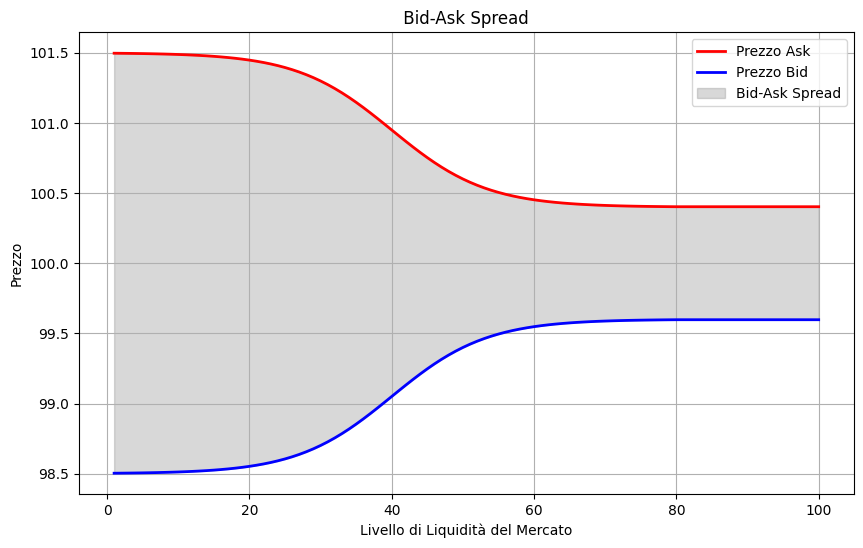

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
liquidity = np.linspace(1, 100, 100)   # Livelli di liquidità da 1 a 100
baseline_price = 100                   # Prezzo base dell'asset

# Parametri per la funzione logistica
max_spread = 3     # Spread massimo (bassa liquidità)
min_spread = 0.8     # Spread minimo (alta liquidità)
k = 0.15            # Controlla la velocità della transizione
L0 = 40            # Punto medio della transizione
threshold = 80     # Oltre questo livello, lo spread diventa costante

# Calcolo dello spread con funzione logistica per liquidità < threshold
spread_logistic = min_spread + (max_spread - min_spread) * (1 / (1 + np.exp(k * (liquidity - L0))))

# Applichiamo la condizione: per liquidity >= threshold, spread = spread_logistic(80)
spread_threshold = min_spread + (max_spread - min_spread) * (1 / (1 + np.exp(k * (threshold - L0))))
spread = np.where(liquidity < threshold, spread_logistic, spread_threshold)

# Calcolo dei prezzi ask e bid
ask_price = baseline_price + spread / 2
bid_price = baseline_price - spread / 2

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(liquidity, ask_price, label="Prezzo Ask", color='red', linewidth=2)
plt.plot(liquidity, bid_price, label="Prezzo Bid", color='blue', linewidth=2)
plt.fill_between(liquidity, bid_price, ask_price, color='gray', alpha=0.3, label="Bid-Ask Spread")

# Etichette e titolo
plt.xlabel("Livello di Liquidità del Mercato")
plt.ylabel("Prezzo")
plt.title(" Bid-Ask Spread ")
plt.legend()
plt.grid(True)
plt.show()
